In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import tempfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import   OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_all = pd.read_csv("/content/drive/MyDrive/TFM/datos/df_all.csv", sep = ";")

In [ ]:
df_all = df_all.sort_values(by='fecha')
df_all.set_index('fecha', inplace=True)

In [ ]:
df_all.columns

Index(['indicativo', 'prec', 'tmax', 'tmed', 'tmin', 'velmedia', 'racha',
       'sol', 'presMax', 'presMin', 'rhum', 'altitud',
       'porcentaje_pendiente_total', 'alto_riesgo', 'peligro', 'vulner',
       'ocurrencia', 'municipio', 'cod_municipio', 'total_viajes_estacion',
       'total_viajes_km_estacion', 'laborable', 'dayofyear', 'weekend', 'mes'],
      dtype='object')

In [ ]:
df_all.shape

(488345, 25)

In [ ]:
df_all = df_all.drop(['indicativo', 'municipio','total_viajes_km_estacion',	'cod_municipio'], axis=1)
df_all

,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,...,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,total_viajes_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,12.4,12.1,11.9,0.3,8.3,457.0,1020.7,1020.1,63.0,...,2.50,Sí,Molt Alt,Molt Alta,0,0.0,3,1,0,1
2015-01-01,0.0,12.0,11.6,10.8,0.8,1.8,437.0,1034.6,1034.4,55.0,...,2.50,Sí,Molt Alt,Moderada,0,0.0,3,1,0,1
2015-01-01,0.0,13.5,6.2,-1.1,1.9,7.2,7.3,1027.2,1021.7,63.0,...,2.50,Sí,Exclos,Moderada,0,0.0,3,1,0,1
2015-01-01,0.0,11.7,4.2,-3.3,1.1,6.1,7.4,1001.5,996.5,60.0,...,3.22,Sí,Alt,Mitja,0,0.0,3,1,0,1
2015-01-01,0.0,14.2,10.3,6.4,2.5,13.3,429.0,1034.6,1034.4,68.0,...,5.10,Sí,Molt Alt,Moderada,0,0.0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,0.0,2.1,1.9,1.6,2.2,6.9,501.0,1019.9,1019.1,63.0,...,5.10,Sí,Moderat,Molt Alta,0,0.0,1,32,0,2
2022-02-01,0.0,10.7,10.5,10.1,8.7,13.0,603.0,1022.2,1021.8,37.0,...,3.22,Sí,Alt,Molt Alta,0,0.0,1,32,0,2
2022-02-01,0.0,-5.9,-6.1,-6.4,4.5,6.8,276.0,1002.4,1001.8,97.0,...,0.10,No,Moderat,Molt Alta,0,0.0,1,32,0,2


In [ ]:
df_all = df_all.loc['2015-01-01':'2022-02-01']  

In [ ]:
df_all.shape

(488345, 21)

In [ ]:
df_all.groupby("ocurrencia").count()

,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,total_viajes_estacion,laborable,dayofyear,weekend,mes
ocurrencia,,,,,,,,,,,,,,,,,,,,
0,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316,485316
1,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029,3029


#Model Xgboost

In [ ]:
df_all.groupby("ocurrencia").count().columns

Index(['prec', 'tmax', 'tmed', 'tmin', 'velmedia', 'racha', 'sol', 'presMax',
       'presMin', 'rhum', 'altitud', 'porcentaje_pendiente_total',
       'alto_riesgo', 'peligro', 'vulner', 'total_viajes_estacion',
       'laborable', 'dayofyear', 'weekend', 'mes'],
      dtype='object')

In [ ]:
df_ocurrencia_0 = df_all[df_all["ocurrencia"]==0].sample(3029)

In [ ]:
df_ocurrencia_1 = df_all[df_all["ocurrencia"]==1]

In [ ]:
df_all_rus =  pd.concat([df_ocurrencia_0, df_ocurrencia_1])
df_all_rus.shape

(6058, 21)

In [ ]:
X = df_all_rus.drop( ['ocurrencia'], axis=1)
y = df_all_rus['ocurrencia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
df_all_rus.shape, X.shape,  y.shape

((6058, 21), (6058, 20), (6058,))

In [ ]:
# normalizacion de los datos numericos
numericalCols_train = X_train[["prec","tmed","tmax", "tmin","velmedia", "racha","sol","presMax","presMin","rhum", "altitud", "porcentaje_pendiente_total", 'total_viajes_estacion']]
numericalCols_test = X_test[["prec","tmed","tmax", "tmin","velmedia", "racha","sol","presMax","presMin","rhum", "altitud", "porcentaje_pendiente_total", 'total_viajes_estacion']]

scaler = StandardScaler()
scaler.fit(numericalCols_train)

numericalCols_train_scaled = scaler.transform(numericalCols_train)
numericalCols_test_scaled = scaler.transform(numericalCols_test)

numericalCols_train_scaled.shape , numericalCols_test_scaled.shape

((4846, 13), (1212, 13))

In [ ]:
# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_train = X_train[['alto_riesgo',	'peligro',	'vulner']]  #alto_riesgo	peligro	vulner
categoricalCols_train = OneHotEncoder().fit_transform(categoricalCols_train).toarray()


# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_test = X_test[['alto_riesgo',	'peligro',	'vulner',]]   #alto_riesgo	peligro	 y vulner
categoricalCols_test = OneHotEncoder().fit_transform(categoricalCols_test).toarray()

categoricalCols_train.shape, categoricalCols_test.shape

((4846, 12), (1212, 12))

In [ ]:
Other_var_train = X_train[['laborable', 	'dayofyear', 	'weekend', 	'mes']]
Other_var_test = X_test[['laborable', 	'dayofyear', 	'weekend', 	'mes']]  #alto_riesgo	peligro	 y vulner

In [ ]:
df_train_scaled = np.concatenate((numericalCols_train_scaled , categoricalCols_train, Other_var_train), axis=1)
df_test_scaled = np.concatenate((numericalCols_test_scaled , categoricalCols_test, Other_var_test), axis=1)

In [ ]:
X_test = df_test_scaled
X_train = df_train_scaled

In [ ]:
model_xgb = XGBClassifier(n_estimators= 500, 
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1, 
                      max_depth=5, verbose=3)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.0001, max_depth=5, n_estimators=500, n_jobs=-1,
              verbose=3)

In [ ]:
y_pred = model_xgb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6823432343234324

Conjunto de datos de validación
  Exactitud:     0.68234
  Precisión:     0.68421
  Exhaustividad: 0.68234
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       606
           1       0.67      0.73      0.70       606

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.68      1212
weighted avg       0.68      0.68      0.68      1212



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


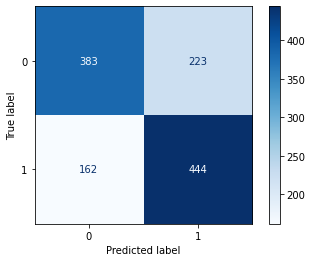

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_xgb, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

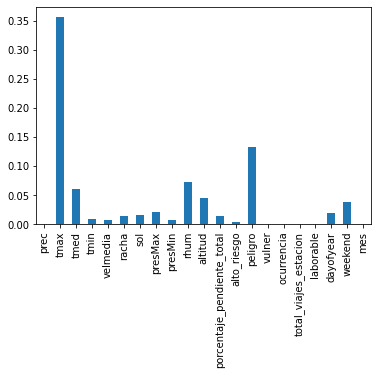

In [ ]:
importances = model_xgb.feature_importances_
importances_dict = dict(zip(df_all.columns, importances))
pd.Series(importances_dict).plot(kind='bar')

#Grid Model Xgboost 

In [ ]:
param_grid = {
    'n_estimators': [1500],
    'max_depth' : [5, 10],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [5, 10],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 50}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 50}],
                         'max_depth': [5, 10], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10], 'n_estimators': [1500]},
             verbose=True)

In [ ]:
final_model = grid_search.best_estimator_
final_model

XGBClassifier(class_weight={0: 1, 1: 1}, max_depth=5, min_samples_leaf=5,
              min_samples_split=5, n_estimators=1500)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.68234
  Precisión:     0.68421
  Exhaustividad: 0.68234
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       606
           1       0.67      0.73      0.70       606

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.68      1212
weighted avg       0.68      0.68      0.68      1212



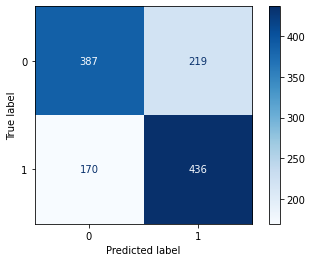

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

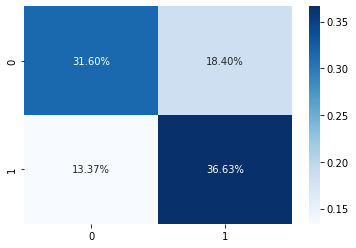

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

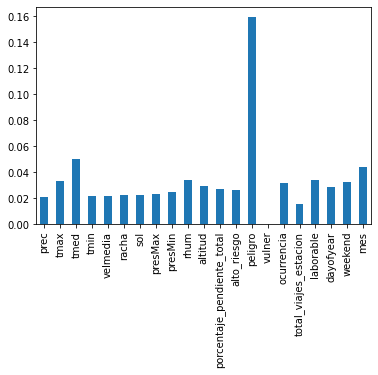

In [ ]:
importances_final = final_model.feature_importances_
importances_dict_final = dict(zip(df_all.columns, importances_final))
pd.Series(importances_dict_final).plot(kind='bar')

#Balanceo de clases con SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE 
X_smote , y_smote = SMOTE().fit_resample(X_train, y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))


Before OverSampling, counts of label '1': 2423
Before OverSampling, counts of label '0': 2423 

After OverSampling, the shape of train_X: (4846, 29)
After OverSampling, the shape of train_y: (4846,) 

After OverSampling, counts of label '1': 2423
After OverSampling, counts of label '0': 2423


In [ ]:
model_xgb.fit(X_smote, y_smote)

XGBClassifier(learning_rate=0.0001, max_depth=5, n_estimators=500, n_jobs=-1,
              verbose=3)

In [ ]:
y_pred = model_xgb.predict(X_test)

Conjunto de datos de validación
  Exactitud:     0.68234
  Precisión:     0.68421
  Exhaustividad: 0.68234
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       606
           1       0.67      0.73      0.70       606

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.68      1212
weighted avg       0.68      0.68      0.68      1212



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


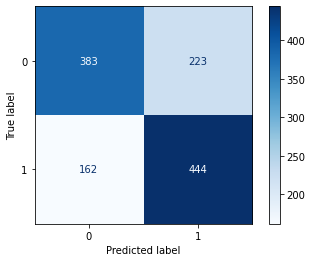

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_xgb, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

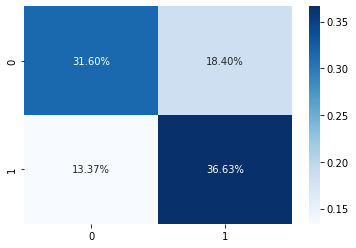

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

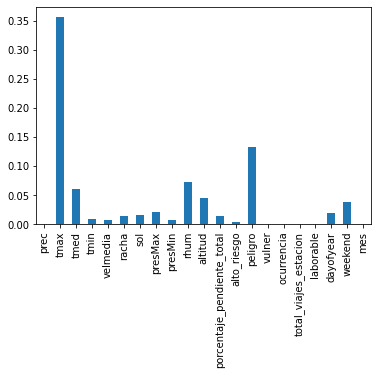

In [ ]:
importances_smote = model_xgb.feature_importances_
importances_dict_smote = dict(zip(df_all.columns, importances_smote))
pd.Series(importances_dict_smote).plot(kind='bar')

#Grid Smote

In [ ]:
param_grid = {
    'n_estimators': [1000],
    'max_depth' : [5, 10],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [5, 10],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 50}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_smote = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=True)
grid_search_smote.fit(X_smote, y_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 50}],
                         'max_depth': [5, 10], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10], 'n_estimators': [1000]},
             verbose=True)

In [ ]:
final_model_smote = grid_search_smote.best_estimator_
final_model_smote

XGBClassifier(class_weight={0: 1, 1: 1}, max_depth=5, min_samples_leaf=5,
              min_samples_split=5, n_estimators=1000)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.68234
  Precisión:     0.68421
  Exhaustividad: 0.68234
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       606
           1       0.67      0.73      0.70       606

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.68      1212
weighted avg       0.68      0.68      0.68      1212



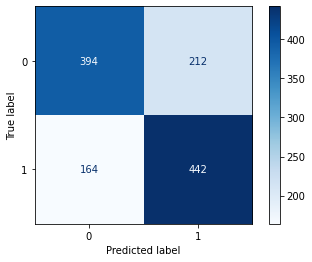

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model_smote, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

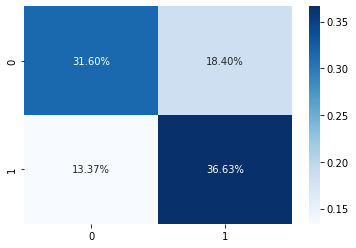

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

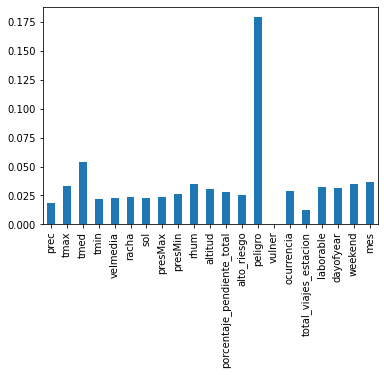

In [ ]:
importances_smote_final = final_model_smote.feature_importances_
importances_dict_final_smote = dict(zip(df_all.columns, importances_smote_final))
pd.Series(importances_dict_final_smote).plot(kind='bar')

#Balanceo de clases RandomUnderSampler


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X_rus , y_rus = RandomUnderSampler().fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After UnderSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_rus.shape))
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_rus == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_rus == 0)))

Before UnderSampling, counts of label '1': 2423
Before UnderSampling, counts of label '0': 2423 

After UnderSampling, the shape of train_X: (4846, 29)
After UnderSampling, the shape of train_y: (4846,) 

After UnderSampling, counts of label '1': 2423
After UnderSampling, counts of label '0': 2423


In [ ]:
model_rus = XGBClassifier(n_estimators= 1500, 
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1, 
                      max_depth=20, verbose=3)

In [ ]:
model_rus.fit(X_rus, y_rus)

XGBClassifier(learning_rate=0.0001, max_depth=20, n_estimators=1500, n_jobs=-1,
              verbose=3)

In [ ]:
y_pred = model_rus.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.67574
  Precisión:     0.67580
  Exhaustividad: 0.67574
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       606
           1       0.67      0.68      0.68       606

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.68      1212
weighted avg       0.68      0.68      0.68      1212



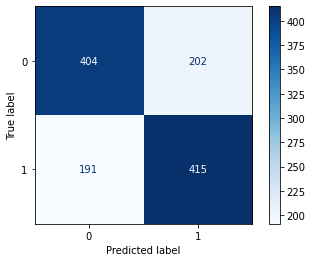

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_rus, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

In [ ]:
y_test.sum(), y_pred.sum(), y_train.sum(), y_rus.sum()

(606, 617, 2423, 2423)

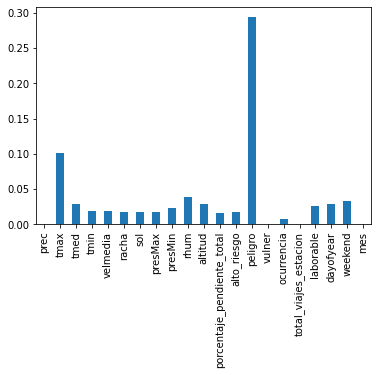

In [ ]:
importances_rus = model_rus.feature_importances_
importances_dict_rus = dict(zip(df_all_rus.columns, importances_rus))
pd.Series(importances_dict_rus).plot(kind='bar')

#Grid RUS

In [ ]:
param_grid = {
    'n_estimators': [1500],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [5, 10,15],
    'min_samples_leaf' : [5, 10,15],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 50}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_rus, y_rus)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 50}],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [1500]},
             verbose=True)

In [ ]:
final_model_rus = grid_search.best_estimator_
final_model_rus

XGBClassifier(class_weight={0: 1, 1: 1}, max_depth=10, min_samples_leaf=5,
              min_samples_split=5, n_estimators=1500)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.67574
  Precisión:     0.67580
  Exhaustividad: 0.67574
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       606
           1       0.67      0.68      0.68       606

    accuracy                           0.68      1212
   macro avg       0.68      0.68      0.68      1212
weighted avg       0.68      0.68      0.68      1212



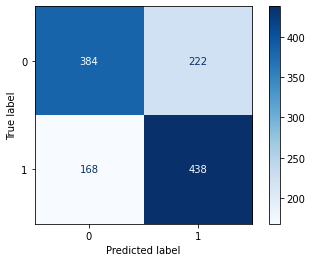

In [ ]:
fcm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model_rus, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

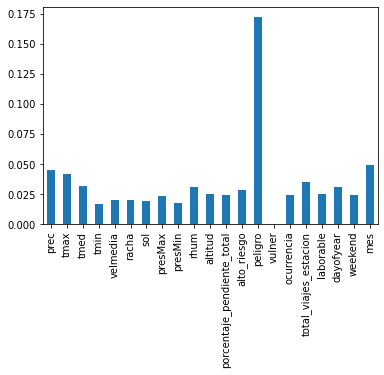

In [ ]:
importances_rus_1 = final_model_rus.feature_importances_
importances_dict_rus_1 = dict(zip(df_all.columns, importances_rus_1))
pd.Series(importances_dict_rus_1).plot(kind='bar')

#Seleccion de variables importantes


In [ ]:
df_important = df_all.drop(['presMax', 'prec','sol', 'racha','tmed', 'tmin','porcentaje_pendiente_total','presMin', 'altitud', 'vulner', 'alto_riesgo', 'laborable', 'weekend' ], axis=1)
df_important

,tmax,velmedia,rhum,peligro,ocurrencia,total_viajes_estacion,dayofyear,mes
fecha,,,,,,,,
2015-01-01,12.4,0.3,63.0,Molt Alt,0,0.0,1,1
2015-01-01,12.0,0.8,55.0,Molt Alt,0,0.0,1,1
2015-01-01,13.5,1.9,63.0,Exclos,0,0.0,1,1
2015-01-01,11.7,1.1,60.0,Alt,0,0.0,1,1
2015-01-01,14.2,2.5,68.0,Molt Alt,0,0.0,1,1
...,...,...,...,...,...,...,...,...
2022-02-01,2.1,2.2,63.0,Moderat,0,0.0,32,2
2022-02-01,10.7,8.7,37.0,Alt,0,0.0,32,2
2022-02-01,-5.9,4.5,97.0,Moderat,0,0.0,32,2


In [ ]:
df_important.groupby("ocurrencia").count()

,tmax,velmedia,rhum,peligro,total_viajes_estacion,dayofyear,mes
ocurrencia,,,,,,,
0,485316,485316,485316,485316,485316,485316,485316
1,3029,3029,3029,3029,3029,3029,3029


In [ ]:
df_important.groupby("ocurrencia").count().columns

Index(['tmax', 'velmedia', 'rhum', 'peligro', 'total_viajes_estacion',
       'dayofyear', 'mes'],
      dtype='object')

In [ ]:
df_ocurrencia_0 = df_important[df_important["ocurrencia"]==0].sample(3029)

In [ ]:
df_ocurrencia_1 = df_important[df_important["ocurrencia"]==1]

In [ ]:
df_important =  pd.concat([df_ocurrencia_0, df_ocurrencia_1])
df_important.shape
df_important

,tmax,velmedia,rhum,peligro,ocurrencia,total_viajes_estacion,dayofyear,mes
fecha,,,,,,,,
2021-03-31,21.1,2.0,23.0,Moderat,0,0.00,90,3
2020-04-11,17.6,4.4,40.0,Molt Alt,0,200349.66,102,4
2020-01-13,11.8,0.5,58.0,Moderat,0,0.00,13,1
2018-02-22,9.1,2.8,90.0,Molt Alt,0,0.00,53,2
2020-05-15,16.9,1.1,80.0,Exclos,0,6283.18,136,5
...,...,...,...,...,...,...,...,...
2021-12-21,11.9,1.8,90.0,Moderat,1,0.00,355,12
2021-12-23,14.0,14.0,76.0,Molt Alt,1,0.00,357,12
2021-12-29,18.4,2.7,50.0,Molt Alt,1,0.00,363,12


In [ ]:
X = df_important.drop( ['ocurrencia'], axis=1)
y = df_important['ocurrencia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
df_all.shape,  X_train.shape, y_train.shape, X_test.shape, y_test.shape

((488345, 21), (4846, 7), (4846,), (1212, 7), (1212,))

In [ ]:
df_important.columns

Index(['tmax', 'velmedia', 'rhum', 'peligro', 'ocurrencia',
       'total_viajes_estacion', 'dayofyear', 'mes'],
      dtype='object')

In [ ]:
# normalizacion de los datos numericos
numericalCols_train = X_train[["tmax", "velmedia" , "rhum", "total_viajes_estacion"]]
numericalCols_test = X_test[["tmax", "velmedia" , "rhum", "total_viajes_estacion"]]

scaler = StandardScaler()
scaler.fit(numericalCols_train)

numericalCols_train_scaled = scaler.transform(numericalCols_train)
numericalCols_test_scaled = scaler.transform(numericalCols_test)

numericalCols_train_scaled.shape , numericalCols_test_scaled.shape

((4846, 4), (1212, 4))

In [ ]:
# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_train = X_train[['peligro']]  #alto_riesgo	peligro	vulner
categoricalCols_train = OneHotEncoder().fit_transform(categoricalCols_train).toarray()


# normalizacion de los datos categoricos , sin la ocurrencia
categoricalCols_test = X_test[['peligro']]   #alto_riesgo	peligro	 y vulner
categoricalCols_test = OneHotEncoder().fit_transform(categoricalCols_test).toarray()

categoricalCols_train.shape, categoricalCols_test.shape

((4846, 5), (1212, 5))

In [ ]:
Other_var_train = X_train[['dayofyear','mes']]
Other_var_test = X_test[['dayofyear','mes']] #alto_riesgo	peligro	 y vulner

In [ ]:
df_train_scaled = np.concatenate((numericalCols_train_scaled , categoricalCols_train, Other_var_train), axis=1)
df_test_scaled = np.concatenate((numericalCols_test_scaled , categoricalCols_test, Other_var_test), axis=1)

In [ ]:
df_train_scaled.shape, y_train.shape, df_test_scaled.shape, y_test.shape

((4846, 11), (4846,), (1212, 11), (1212,))

In [ ]:
X_test = df_test_scaled
X_train = df_train_scaled

In [ ]:
model_importances = XGBClassifier(n_estimators= 1500, 
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1, 
                      max_depth=20, verbose=3)

In [ ]:
model_importances.fit(X_train, y_train)

XGBClassifier(learning_rate=0.0001, max_depth=20, n_estimators=1500, n_jobs=-1,
              verbose=3)

In [ ]:
y_pred = model_importances.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6476897689768977

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.64769
  Precisión:     0.64836
  Exhaustividad: 0.64876
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       572
           1       0.68      0.63      0.65       640

    accuracy                           0.65      1212
   macro avg       0.65      0.65      0.65      1212
weighted avg       0.65      0.65      0.65      1212



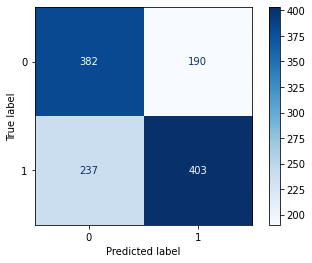

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_importances, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print(classification_report(y_test, y_pred))

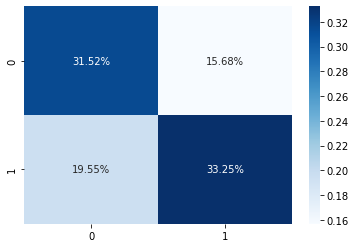

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

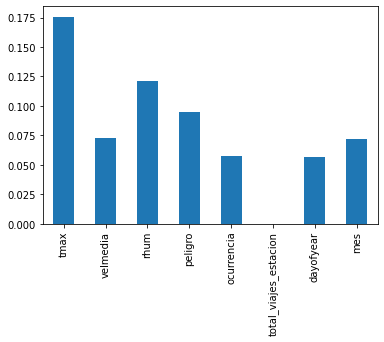

In [ ]:
importances_1 = model_importances.feature_importances_
importances_dict_1 = dict(zip(df_important.columns, importances_1))
pd.Series(importances_dict_1).plot(kind='bar')

#Grid Variables Importantes

In [ ]:
param_grid = {
    'n_estimators': [1500],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [5, 10,15],
    'min_samples_leaf' : [5, 10,15],
    'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 50}]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 50}],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [1500]},
             verbose=True)

In [ ]:
final_model_import= grid_search.best_estimator_
final_model_import

XGBClassifier(class_weight={0: 1, 1: 1}, max_depth=5, min_samples_leaf=5,
              min_samples_split=5, n_estimators=1500)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Conjunto de datos de validación
  Exactitud:     0.64769
  Precisión:     0.64836
  Exhaustividad: 0.64876
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       572
           1       0.68      0.63      0.65       640

    accuracy                           0.65      1212
   macro avg       0.65      0.65      0.65      1212
weighted avg       0.65      0.65      0.65      1212



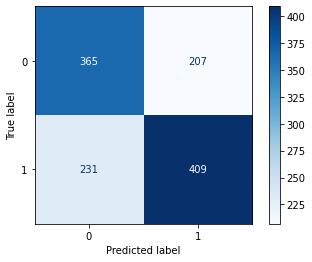

In [ ]:
fcm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model_import, X_test, y_test, cmap = plt.cm.Blues)

print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')
print(classification_report(y_test, y_pred))

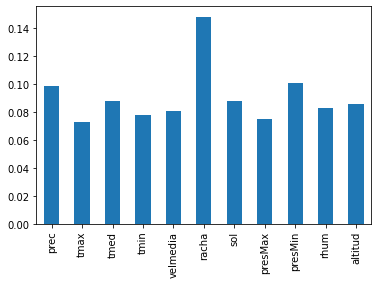

In [ ]:
importances_import = final_model_import.feature_importances_
importances_dict_import = dict(zip(df_all.columns, importances_import))
pd.Series(importances_dict_import).plot(kind='bar')